<a href="https://www.kaggle.com/code/velimirkovacic/mn-0036533917-explanatory-data-analysis-eda?scriptVersionId=183359233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df_train = pd.read_csv("../input/dapprojekt24-1/train.csv")
df_test = pd.read_csv("../input/dapprojekt24-1/test.csv")


/kaggle/input/dapprojekt24-1/train.csv
/kaggle/input/dapprojekt24-1/test.csv


## 1. Dimensionality of the dataset 


In [3]:
#df_train = pd.read_csv('train.csv')  
#df_test = pd.read_csv("test.csv")

print("Train set")
print("Shape:", df_train.shape)

print("Column names: ", end="")
for c in df_train.columns:
    print(c, end= ", ")

print("\nUnique stocks:", df_train["Symbol"].nunique())

print("\n")

print("Test set")
print("Shape:", df_test.shape)

print("Column names: ", end="")
for c in df_test.columns:
    print(c, end= ", ")

print("\nUnique stocks:", df_test["Symbol"].nunique())


if(set(df_test["Symbol"].unique()) == set(df_train["Symbol"].unique())):
    print("\nUnique stocks are the same among both datasets")


df_train

Train set
Shape: (501400, 10)
Column names: Date, Symbol, Adj Close, Close, High, Low, Open, Volume, Target, Id, 
Unique stocks: 200


Test set
Shape: (209600, 9)
Column names: Date, Symbol, Adj Close, Close, High, Low, Open, Volume, Id, 
Unique stocks: 200

Unique stocks are the same among both datasets


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0,0,0
1,2010-01-05,MMM,52.961575,82.500000,83.230003,81.699997,82.800003,2847000.0,0,1
2,2010-01-06,MMM,53.712681,83.669998,84.599998,83.510002,83.879997,5268500.0,0,2
3,2010-01-07,MMM,53.751179,83.730003,83.760002,82.120003,83.320000,4470100.0,0,3
4,2010-01-08,MMM,54.129955,84.320000,84.320000,83.300003,83.690002,3405800.0,0,4
...,...,...,...,...,...,...,...,...,...,...
501395,2019-12-24,ZTS,131.227859,132.919998,133.080002,131.289993,132.210007,442500.0,1,501395
501396,2019-12-26,ZTS,131.336456,133.029999,133.190002,132.320007,133.190002,929400.0,1,501396
501397,2019-12-27,ZTS,131.553665,133.250000,133.479996,132.380005,133.399994,1296100.0,1,501397
501398,2019-12-30,ZTS,130.526886,132.210007,133.660004,131.809998,133.570007,942000.0,1,501398


There are two datasets, a train set and a test set. The train set consists of 501400 rows (samples) and 10 columns (features). The test set consists of 209600 samples and 9 features (missing the target feature). 

The column (feature) names are: 
* Date
* Symbol
* Adj Close
* Close
* High
* Low
* Open
* Volume
* Target
* Id

There are 200 different stocks, denoted by their symbol in the Symbol column. They are the same among both datasets.

## 2. Missing values

In [4]:
def find_missing_sections(df):
    rows_with_missing_values = df.isnull().sum(axis = 1) > 0

    missing_value_indexes = df[rows_with_missing_values].index

    if (len(missing_value_indexes) == 0):
        return []

    # We find the beginning and and indexes of sections with missing values
    missing_value_limits = [missing_value_indexes[0]]
    for i in range(len(missing_value_indexes[1:])):
        if missing_value_indexes[i] - 1 > missing_value_indexes[i - 1]:
            missing_value_limits += [missing_value_indexes[i - 1], missing_value_indexes[i]]
    missing_value_limits += [missing_value_indexes[-1]] 


    # We transform them into (section beginning, section end) pairs
    missing_value_sections = []
    for i in range(0, len(missing_value_limits), 2):
        missing_value_sections += [(missing_value_limits[i], missing_value_limits[i + 1])]

    return missing_value_sections


In [5]:
print("Train")

missing_value_sections_train = find_missing_sections(df_train)
print("Sections with missing values: ", len(missing_value_sections_train))
for section in missing_value_sections_train:
    print(section, "length:", section[1] - section[0])


print("Test")

missing_value_sections_test = find_missing_sections(df_test)
print("Sections with missing values: ", len(missing_value_sections_test))
for section in missing_value_sections_test:
    print(section, "length:", section[1] - section[0])

Train
Sections with missing values:  28
(500, 515) length: 15
(17549, 18524) length: 975
(50140, 51252) length: 1112
(85238, 85349) length: 111
(90252, 90252) length: 0
(100280, 101468) length: 1188
(117829, 120182) length: 2353
(132871, 133571) length: 700
(155434, 155998) length: 564
(188025, 188264) length: 239
(190532, 192158) length: 1626
(193039, 195340) length: 2301
(200560, 203066) length: 2506
(205574, 205600) length: 26
(208081, 208302) length: 221
(228137, 229129) length: 992
(255714, 257486) length: 1772
(258221, 259062) length: 841
(263235, 265741) length: 2506
(270756, 271962) length: 1206
(278277, 278556) length: 279
(293319, 293397) length: 78
(295826, 296197) length: 371
(358501, 359073) length: 572
(418669, 419819) length: 1150
(421176, 421409) length: 233
(456274, 458780) length: 2506
(498893, 499667) length: 774
Test
Sections with missing values:  3
(83840, 84584) length: 744
(110040, 110879) length: 839
(190736, 191680) length: 944


There are 27245 rows with one or more missing values in the train set organized in 28 distinct sections. 
* 500 - 515, Only the Volume value is missing. (Replace)
* 17549 - 18524, a section of 975 days with no values except the date and stock symbol (Erase)
* 50140 - 51252, a section of 1112 days with no values except the date and stock symbol (Erase)
* and so on...

For each section we can either replace the missing values or erase the rows. For the section with 15 missing Volume values it would make sense to just replace the value as it is a rather short section and this will not distort the data too much. For the very long sections which are missing every value we have no other choice than to erase them as replacing them would not give us any useful information in the future analysis of the data.

We will erase all rows which have no values except the date and stock symbol and search for missing values again. We will not modify the test dataset as we will still have to make predictions even for the samples with missing values.


In [6]:
print("Train")
df_train = df_train.dropna(thresh=8)
missing_value_sections_train = find_missing_sections(df_train)
print("Sections with missing values: ", len(missing_value_sections_train))
for section in missing_value_sections_train:
    print(section, "length:", section[1] - section[0])


Train
Sections with missing values:  1
(500, 515) length: 15


We are still left with the section of 16 rows missing the value for Volume. We will solve this by using linear interpolation to bridge the gap between row 499 and row 516.

In [7]:
missing_begin, missing_end = missing_value_sections_train[0]
df_train.loc[:, "Volume"] = df_train["Volume"].interpolate(method='linear')
result_df = df_train.iloc[range(missing_begin - 1, missing_end + 2)]

In [8]:
print("Train")
df_train = df_train.dropna(thresh=8)
missing_value_sections_train = find_missing_sections(df_train)
print("Sections with missing values: ", len(missing_value_sections_train))
for section in missing_value_sections_train:
    print(section, "length:", section[1] - section[0])

Train
Sections with missing values:  0


There are no more rows with missing values.

## 3. Duplicates

In [9]:
print("Train")
duplicate_rows = df_train.duplicated()
print("Numer of duplicate rows:", len(df_train[duplicate_rows]))
duplicate_date_symbol = df_train.duplicated(subset=["Date", "Symbol"])
print("Numer of duplicate Date-Symbol pairs:", len(df_train[duplicate_date_symbol]))
duplicate_id = df_train.duplicated(subset=["Id"])
print("Numer of duplicate Id-s:", len(df_train[duplicate_id]))

print("Test")
duplicate_rows = df_test.duplicated()
print("Numer of duplicate rows:", len(df_test[duplicate_rows]))
duplicate_date_symbol = df_test.duplicated(subset=["Date", "Symbol"])
print("Numer of duplicate Date-Symbol pairs:", len(df_test[duplicate_date_symbol]))
duplicate_id = df_test.duplicated(subset=["Id"])
print("Numer of duplicate Id-s:", len(df_test[duplicate_id]))

Train
Numer of duplicate rows: 0
Numer of duplicate Date-Symbol pairs: 0
Numer of duplicate Id-s: 0
Test
Numer of duplicate rows: 0
Numer of duplicate Date-Symbol pairs: 0
Numer of duplicate Id-s: 0


There is no duplicate data.

## 4. Data validation

The following must be true for all samples:
1. Adjusted closing price must be less or equal to the closing price.
2. Low price must be less or equal to the high price.
3. Opening and closing price must be in the interval between the low price and the high price.
4. Volume is an integer.
5. All values are positive.

In terms of equations:

* Adj Close &le; Close
* Low &le; High
* Open ∈ [Low, High]
* Close ∈ [Low, High]
* Volume ∈ $\mathbb{Z}$

In [10]:
def validate_data(df):
    print("Train")
    adjc_bigger_c = df["Adj Close"] > df["Close"]
    print("Rows with Adj Close > Close:", len(df[adjc_bigger_c]))
    low_high = df["Low"] > df["High"]
    print("Rows with Low > High:", len(df[low_high]))
    open_in = (df["Open"] < df["Low"]) | (df["Open"] > df["High"])
    print("Rows with Open < Low or Open > High:", len(df[open_in]))
    close_in = ( df["Close"] < df["Low"]) | (df["Close"] > df["High"])
    print("Rows with Close < Low or Close > High:", len(df[close_in]))
    negative = (df["Adj Close"] < 0) | (df["Close"] < 0) | (df["Open"] < 0) | (df["Low"] < 0) | (df["High"] < 0)
    print("Rows with negative features:", len(df[negative]))


    print("Are they the same? ", end="")
    print((df[negative].index == df[open_in].index).all() and (df[low_high].index == df[open_in].index).all() and (df[close_in].index == df[open_in].index).all())

    isnt_Z = df["Volume"].apply(lambda x: not x.is_integer())
    print("Rows where Volume isn\'t an integer:", len(df[isnt_Z]))

    return negative, isnt_Z


issue1, issue2 = validate_data(df_train)
df_train[issue1]


Train
Rows with Adj Close > Close: 0
Rows with Low > High: 110
Rows with Open < Low or Open > High: 110
Rows with Close < Low or Close > High: 110
Rows with negative features: 110
Are they the same? True
Rows where Volume isn't an integer: 16


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
60596,2011-09-14,BALL,17.094999,17.094999,-51.885000,16.750000,17.125000,2850400.0,1,60596
60597,2011-09-15,BALL,17.115000,17.115000,-51.750000,17.020000,17.240000,3416400.0,1,60597
60598,2011-09-16,BALL,17.155001,17.155001,-51.764997,16.985001,17.165001,3888200.0,1,60598
60599,2011-09-19,BALL,16.855000,16.855000,-50.774998,16.565001,16.885000,2524400.0,1,60599
60600,2011-09-20,BALL,16.754999,16.754999,-51.270000,16.705000,16.879999,2251000.0,1,60600
...,...,...,...,...,...,...,...,...,...,...
60701,2012-02-14,BALL,19.934999,19.934999,-59.909998,19.805000,19.915001,1077600.0,1,60701
60702,2012-02-15,BALL,19.865000,19.865000,-60.105000,19.820000,19.959999,1644200.0,1,60702
60703,2012-02-16,BALL,20.160000,20.160000,-60.584999,19.780001,19.885000,1473200.0,1,60703
60704,2012-02-17,BALL,20.055000,20.055000,-60.750000,20.000000,20.250000,1387600.0,1,60704


In [11]:
df_train[issue2]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
500,2011-12-27,MMM,55.581924,82.279999,82.639999,81.620003,81.910004,2.129282e+06,1,500
501,2011-12-28,MMM,54.818573,81.150002,82.440002,80.940002,82.220001,2.216365e+06,1,501
502,2011-12-29,MMM,55.467079,82.110001,82.199997,81.190002,81.370003,2.303447e+06,1,502
503,2011-12-30,MMM,55.210377,81.730003,82.449997,81.599998,82.230003,2.390529e+06,1,503
504,2012-01-03,MMM,56.399281,83.489998,84.440002,83.360001,83.760002,2.477612e+06,1,504
505,2012-01-04,MMM,56.865433,84.180000,84.260002,83.110001,83.129997,2.564694e+06,1,505
506,2012-01-05,MMM,56.608723,83.800003,83.870003,82.699997,83.529999,2.651776e+06,1,506
507,2012-01-06,MMM,56.318230,83.370003,84.239998,83.320000,83.779999,2.738859e+06,1,507
508,2012-01-09,MMM,56.655991,83.870003,84.059998,83.260002,83.580002,2.825941e+06,1,508
509,2012-01-10,MMM,56.946457,84.300003,85.190002,84.040001,84.589996,2.913024e+06,1,509


There are 110 samples where the High price is negative and about three times higher than the other associated price values. We suspect that the High price is not random but somehow modified from the original price. We can try dividing it by -3 and seeing if the aforementioned constraints are satisfied.

There are also the 16 samples on which we used linear interpolation to fill the gap, we will simply round these to satify the integer constraint.

In [12]:
df_train.loc[issue1, "High"] /= (-3)
df_train.loc[issue2, "Volume"] = df_train.loc[issue2, "Volume"].round()

_, _ = validate_data(df_train)


Train
Rows with Adj Close > Close: 0
Rows with Low > High: 0
Rows with Open < Low or Open > High: 0
Rows with Close < Low or Close > High: 0
Rows with negative features: 0
Are they the same? True
Rows where Volume isn't an integer: 0


Dividing the High price by -3 worked very well, we also tried using a smaller value to divide by such as -3.1, this yielded unfavorable results as not all rows satisfied the constraints. This proces that -3 is the smallest negative value we can use in order to "fix" the prices.

In [13]:
_, _ = validate_data(df_test)


Train
Rows with Adj Close > Close: 0
Rows with Low > High: 0
Rows with Open < Low or Open > High: 0
Rows with Close < Low or Close > High: 0
Rows with negative features: 0
Are they the same? True
Rows where Volume isn't an integer: 2530


There are no problematic rows in the test set.

## 5. Feature distributions

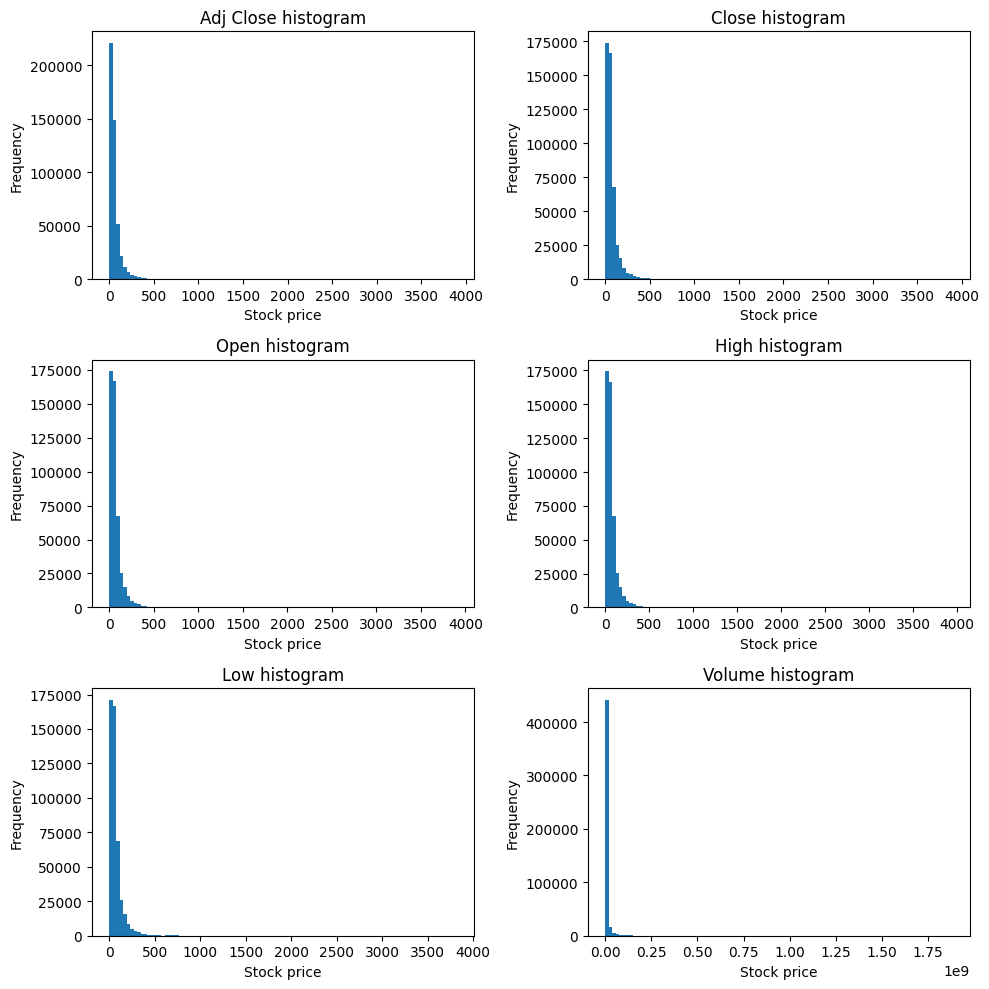

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
339214,2013-01-24,NVR,1000.890015,1000.890015,1026.790039,993.119995,995.000000,56800.0,1,339214
339215,2013-01-25,NVR,1034.400024,1034.400024,1043.219971,996.109985,996.109985,42000.0,1,339215
339216,2013-01-28,NVR,1024.000000,1024.000000,1040.099976,1002.340027,1033.750000,65600.0,1,339216
339217,2013-01-29,NVR,1031.489990,1031.489990,1033.800049,1008.090027,1028.969971,31600.0,1,339217
339218,2013-01-30,NVR,1040.859985,1040.859985,1055.939941,1029.130005,1034.800049,43300.0,1,339218
...,...,...,...,...,...,...,...,...,...,...
340947,2019-12-24,NVR,3817.149902,3817.149902,3818.459961,3791.870117,3791.870117,8000.0,1,340947
340948,2019-12-26,NVR,3810.550049,3810.550049,3830.000000,3785.360107,3816.459961,10700.0,1,340948
340949,2019-12-27,NVR,3816.370117,3816.370117,3828.820068,3794.919922,3811.659912,11100.0,1,340949
340950,2019-12-30,NVR,3823.000000,3823.000000,3834.889893,3786.989990,3814.899902,13200.0,1,340950


In [14]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes = axes.flatten()

cols = ['Adj Close', 'Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    axes[i].hist(df_train[col], bins=100)
    axes[i].set_title(col + " histogram")
    axes[i].set_xlabel("Stock price")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

outliers = df_train["Adj Close"] > 1000
df_train[outliers]

The stock NVR is an outlier as it has a much higher prices than the other stocks. This may not be a problem as it could be solved by good feature extraction. We will visualize the features with a logairthmic scale on the y-axis.

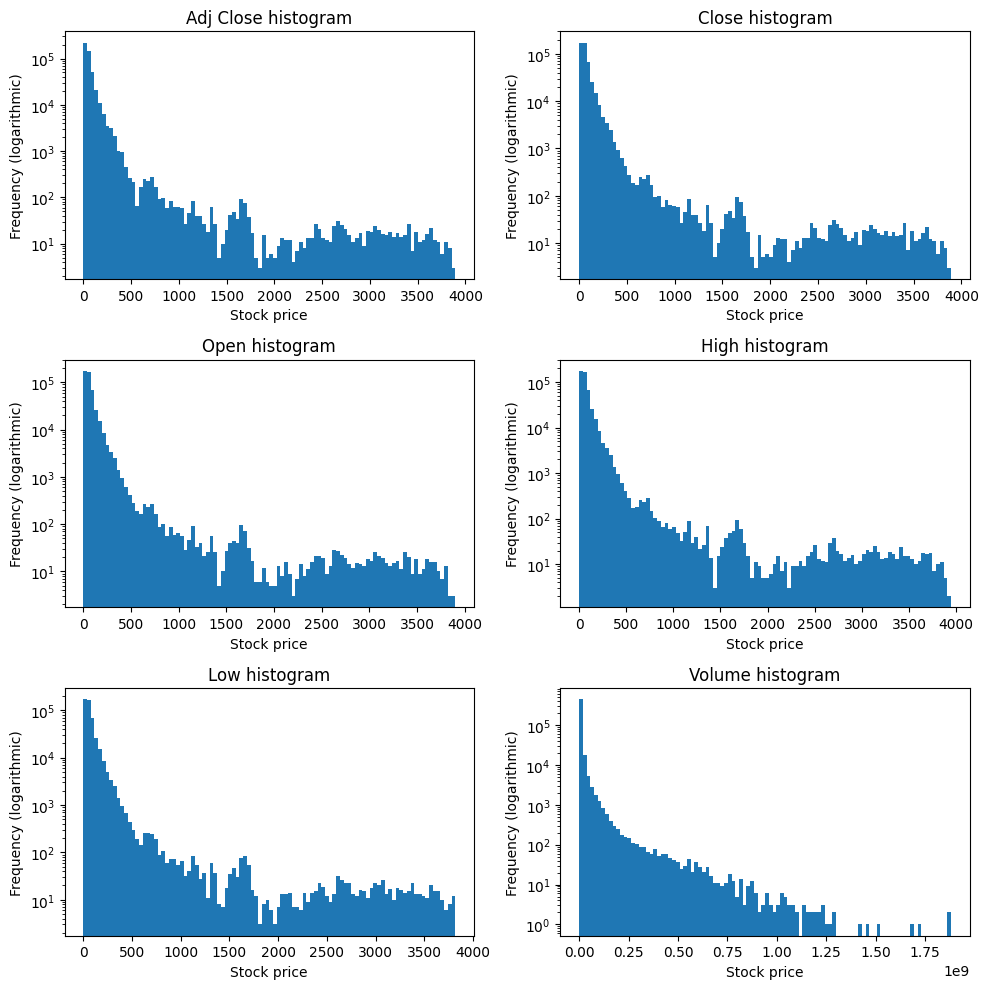

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes = axes.flatten()

cols = ['Adj Close', 'Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    axes[i].hist(df_train[col], bins=100)
    axes[i].set_title(col + " histogram")
    axes[i].set_yscale("log")
    axes[i].set_xlabel("Stock price")
    axes[i].set_ylabel("Frequency (logarithmic)")

plt.tight_layout()
plt.show()

## 6. Visualization

We will visualize price momevemnts of stocks MMM, NVR and GL for 50 days. We will show the opening and closing price as well as the high and low prices.

/tmp/ipykernel_18/3635214132.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_train[stock]["Date"][:length], rotation=45)


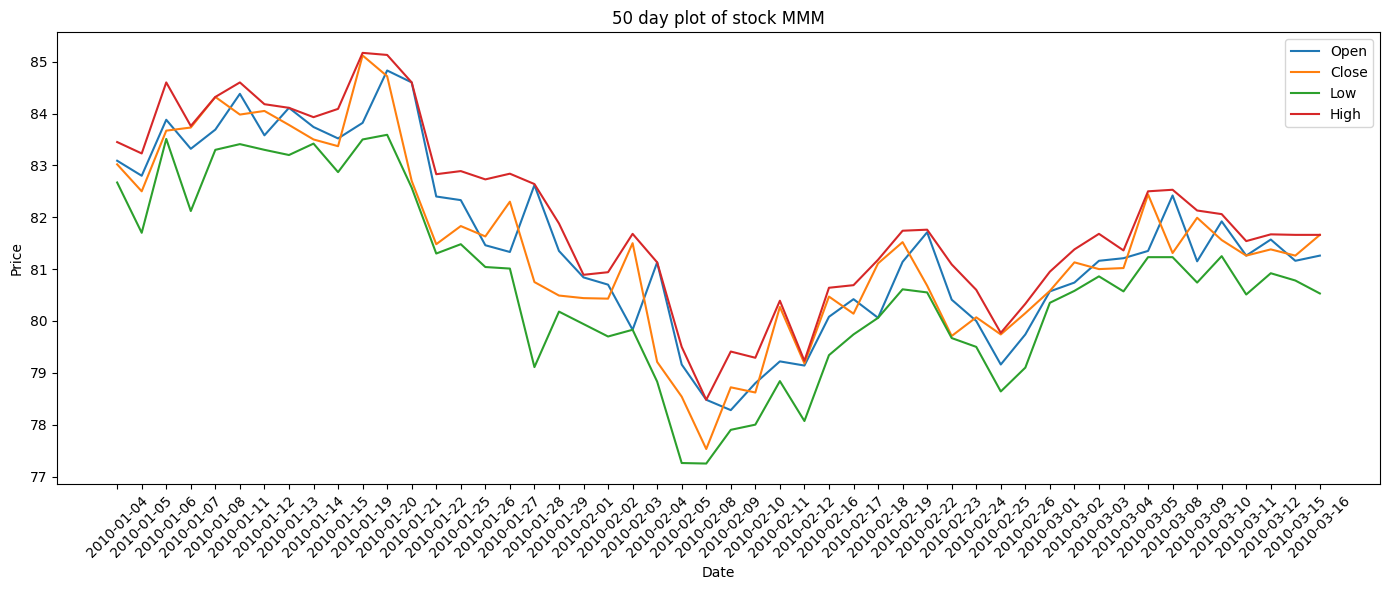

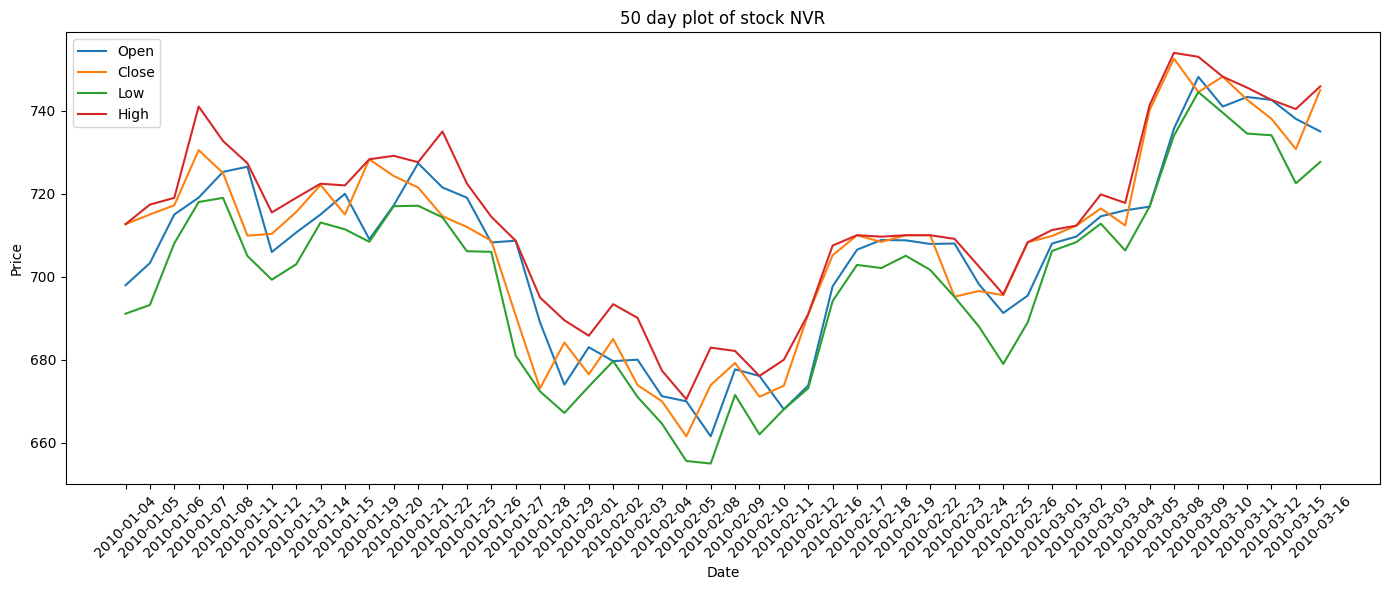

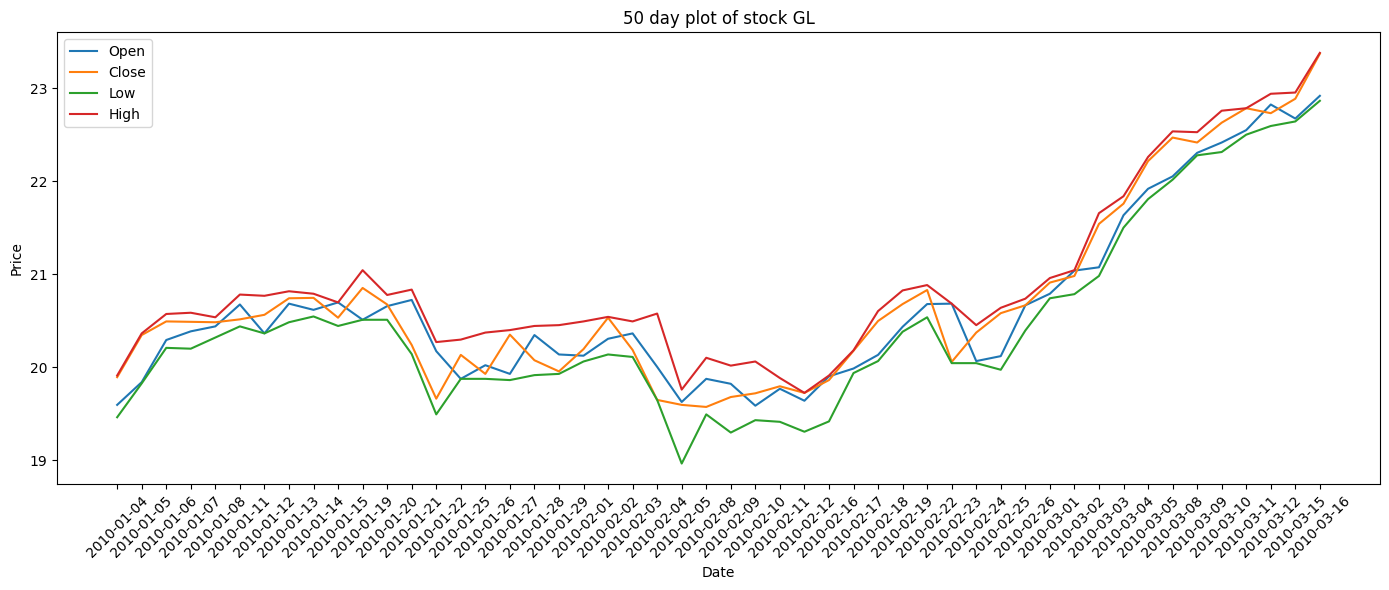

In [16]:
def visualize_stock(symbol, length):
    stock = df_train["Symbol"] == symbol

    fig, ax = plt.subplots(1, 1, figsize=(14, 6))

    for col in ["Open", "Close", "Low", "High"]:
        ax.plot(df_train[stock]["Date"][:length], df_train[stock][col][:length], label=col)
    ax.set_title("50 day plot of stock " + symbol)
    ax.set_xlabel("Date")
    ax.set_xticklabels(df_train[stock]["Date"][:length], rotation=45)
    ax.set_ylabel("Price")
    ax.legend()

    plt.tight_layout()
    plt.show()

visualize_stock("MMM", 50)
visualize_stock("NVR", 50)
visualize_stock("GL", 50)

## 7. Best stock to buy on 15.4.2017.

The question is what makes a stock better to buy than another one. We defined that a stock is worth buying if its price increases at least 2% in the following 2 months. We can thus say that a stock is better to buy if it has the highest price increase in the following 2 months.

The average daily price is calculated as (High - Low)/2.

There is no data for days 14.4.2017., 15.4.2017. and 16.4.2017. We will use the average price of 13.4.2017. and 17.4.2017. as the price on day 15.4.2017. Thankfully, the price for the day 15.5.2017. is available.

In [17]:
first_date = (df_train["Date"] >= "2017-04-13") & (df_train["Date"] <= "2017-04-17")
avg_first = df_train[first_date].groupby("Symbol")[["High", "Low"]].mean()
avg_first["Price"] = (avg_first["High"] + avg_first["Low"])/2

avg_second = df_train[df_train["Date"] == "2017-06-15"].groupby("Symbol")[["High", "Low"]].mean()
avg_second["Price"] = (avg_second["High"] + avg_second["Low"])/2

price_change = ((avg_second - avg_first) / avg_first)[["Price"]]
price_change.rename(columns={"Price": "Change"}, inplace=True)


stock = price_change["Change"].idxmax()
increase = price_change["Change"].max()
print("Stock:", stock)
print(f"Increase: {increase:.4f}%")


Stock: NVDA
Increase: 0.5479%


We can see that the stock with the symbol NVDA, denoting NVIDIA Corp has had the highest increase in price in the following 2 months, an increae of 0.5479%.

## 8. Baseline model

We will first create feature sets that out models will be able to use.

String features (Date and Symbol) will be removed. Id will be removed as it carries no useful information. Adjusted Close is correlated to Close so it will also be removed.

Features will be normalized using min-max scaling.

In [18]:
X_train = df_train.drop(["Id", "Date", "Symbol", "Target", "Adj Close"], axis=1)
y_train = df_train["Target"]

X_test = df_test.drop(["Id", "Date", "Symbol", "Adj Close"], axis=1)

#X['Date'], _ = pd.factorize(X['Date'])
#X['Symbol'], _ = pd.factorize(X['Symbol'])

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


We will use this function to evaluate the models.

In [19]:
def classification_metrics(model):
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    print("Accuracy:", acc)
    cr = classification_report(y_train, y_pred, zero_division=0)
    print("Classification report:\n", cr)
    cm = confusion_matrix(y_train, y_pred)
    print("Confusion matrix:\n", cm)

### 8.1. Logistic Regression


In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

classification_metrics(model)

Accuracy: 0.7817011162639639
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    103511
           1       0.78      1.00      0.88    370660

    accuracy                           0.78    474171
   macro avg       0.39      0.50      0.44    474171
weighted avg       0.61      0.78      0.69    474171

Confusion matrix:
 [[     0 103511]
 [     0 370660]]


### 8.2. XGBoost

In [21]:
model = GradientBoostingClassifier() 
model.fit(X_train, y_train)

classification_metrics(model)

Accuracy: 0.7818951390953897
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.00      0.00    103511
           1       0.78      1.00      0.88    370660

    accuracy                           0.78    474171
   macro avg       0.79      0.50      0.44    474171
weighted avg       0.79      0.78      0.69    474171

Confusion matrix:
 [[   122 103389]
 [    30 370630]]


### 8.3. Random Forest

In [22]:
model = RandomForestClassifier(n_estimators=128)
model.fit(X_train, y_train)

classification_metrics(model)

Accuracy: 0.9999978910561802
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    103511
           1       1.00      1.00      1.00    370660

    accuracy                           1.00    474171
   macro avg       1.00      1.00      1.00    474171
weighted avg       1.00      1.00      1.00    474171

Confusion matrix:
 [[103510      1]
 [     0 370660]]


As we can see, both Logistic Regression and XGBoost classify (almost) every sample into Target = 1 and have a surprisingly high precission because of a disproportion in the number of samples which Target = 0.

Random Forest, on the other hand, has excellent performance on the train set (likely overfitted) and we will use it to predict the test set.

#### Prediction

We have to fill the missing values in the test set in order for Random Forest to properly work. We will use mean fill.

In [23]:
X_test = X_test.fillna(X_test.mean())

In [24]:
y_test = model.predict(X_test)
print(y_test)

[1 1 1 ... 1 0 1]


#### Submission file

In [25]:
# create submission format
submission = df_test.loc[:,df_test.columns.isin(('Id', ))]

# add random predictions as 'Predicted' column into submission df
submission.loc[:,'Target'] = y_test

# Save predictions to working directiory - this creates submission file
submission.to_csv("submission.csv", index=None)

submission

/tmp/ipykernel_18/609806016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[:,'Target'] = y_test


,Id,Target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
209595,209595,1
209596,209596,1
209597,209597,1
209598,209598,0
